<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_Etivity-1

In [2]:
#@title Current Date
Today = '2021-09-19' #@param {type:"date"}


In [3]:
#@markdown ---
#@markdown ### Enter your details here:
Student_ID = "20172257" #@param {type:"string"}
Student_full_name = "Stephen Quirke" #@param {type:"string"}
#@markdown ---

In [4]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = "Final" #@param ["Draft", "Final"]
Submission = True #@param {type:"boolean"}

#Introduction



## MNIST dataset



The MNIST database  is a dataset of handwritten digits that has been and is extensively used in machine learning. There are $10$ classes, each image is $28\times28$ pixels and, therefore, each input is $x_i\in\mathbb{R}^{784}$. 

## Task

You have to extend the code to manage any arbitrary number of classes, in other words you have to implement a general-recipe multinomial logistic classifier and Bayesian multinomial logistic classifier.

You must then select  3 digits at random and perform  the following task. 

1. Your goal is to use Bayesian multinomial logistic regression (as in the road-sign notebook) to solve this classification problem. 

2. You can downsize the training dataset (e.g., 40% training and 60%testing) if the computation of the posterior takes too much time in your computer.

3. Use the posterior uncertainty to detect the instances (digits) in the test set that are hard to classify and remove them from the test-set.

4. Then you need to compute again the accuracy of the general-recipe logistic regression on the remaining (non-difficult) instances and comment on the result.

5. In practice, the task is to use uncertainty estimation to detect the difficult instances in the test-set. This is equivalent to refuse to classify all high-uncertainty instances or, in other words, when we are uncertain we say "I don't know" and we do not return any class. In this way, you will learn how uncertainty can be used to make safer decisions, by detecting the instances that are difficult to classify.


## Libraries

In [5]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [85]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import seaborn as sns
from skimage.io import imread, imshow
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from scipy.io import loadmat
import pymc3 as pm
import random
from IPython.display import HTML
import pickle
import theano as tt
from sklearn.utils import shuffle
from sklearn import metrics

In [86]:
plt.style.use('fivethirtyeight')

In [87]:
# Setting a seed:
np.random.seed(123)

## Dataset

The MNIST dataset (Redmon, 2018) is an easy to use dataset that can be used for Machine Learning Algorithms for beginners.

The dataset consists of two files:  

*   mnist_train.csv
*   mnist_test.csv

The test set contains 60,000 training examples and labels while the mnist_test.csv contains 10,000 test examples of the same. Each row consists of 785 values: the first value is the label (a number from 0 to 9) and the remaining 784 values are the pixel values (a number from 0 to 255). As seen from the graphs, there is an even distribution of the different digits (1-9) with 1 been the highest represented number. 

Link to data: https://www.kaggle.com/oddrationale/mnist-in-csv?select=mnist_test.csv

### Loading the MNIST dataset

In [10]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [88]:
# Path, copy the path from your Drive
Path = '/content/drive/MyDrive/Colab Notebooks/ET5003_Etivity1/'

# MNIST Data
train_data = Path + 'mnist_train.csv'
test_data = Path + 'mnist_test.csv'

# train data
df_train = pd.read_csv(train_data)
X_train = df_train.drop("label",axis=1).values
y_train = df_train.label.values
print(X_train.shape)

# test data
df_test = pd.read_csv(test_data)
X_test = df_test.drop("label",axis=1).values
y_test = df_test.label.values
print(X_test.shape)

(60000, 784)
(10000, 784)


### Commentary

As seen in the description of the data from Kaggle, there is 60k digits in the training set and 10 k for the test set. There is 784 pixels for each digit plus the digit number which equals 795 values per row. We drop the label (digit value) so that is why the shape is 784

In [89]:
# Normalizing the Inputs:
X_train = X_train/255
X_test = X_test/255

# Printing the new input range of values:
minv = np.min(X_train)
maxv = np.max(X_train)
print(minv,maxv)

0.0 1.0


### Commentary

Values are normalized between 0.0 and 1.0

### Description of Data:

In [90]:
# Number of examples
n_train =  len(X_train)
n_test =  len(X_test)

# Shape of an traffic sign image
image_shape = X_train.shape[1]

# unique classes/labels in the training dataset.
alltotal = set(y_train)
n_classes = len(alltotal)

print("Number of Training examples =", n_train)
print("Number of Test examples =", n_test)
print("Image input shape =", image_shape)
print("Number of classes =", n_classes)

Number of Training examples = 60000
Number of Test examples = 10000
Image input shape = 784
Number of classes = 10


### Class Distribution:

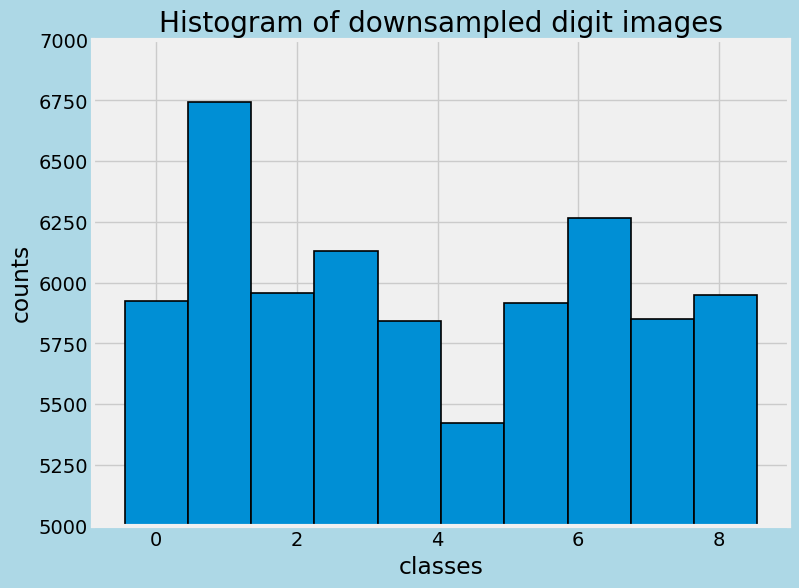

In [94]:
plt.figure(figsize=(8,6), dpi= 100, facecolor='lightblue', edgecolor='k')
plt.hist(y_train, bins=n_classes, edgecolor='black', linewidth=1.2, align ='left')
plt.xlabel('classes')
plt.ylabel('counts')
plt.title('Histogram of downsampled digit images')
plt.ylim ((5000,7000))
plt.show()

## Downsampling

### Randomly selecting 3 of the 10 Digit Classes

In [95]:
def select_number_of_classes(n_classes):
  """
  Returns an arbitrary random selection of digits 
  
  :param n_classes: arbitrary number of classes to be returned
  :return classes: random selection of group of classes totaling number specified
  """

  # Empty list to append the random digit classes we select:
  classes = []

  # We select 3 digits at random and make sure they are unique:
  while len(classes) < n_classes:
    
      # Randomly drawing a digit from 0-9:
      num2choose = np.random.randint(0,10)

      # Append the digit if it's not already in our list of classes:
      if num2choose not in classes: 
          classes.append(num2choose)
        
        
  # Sorting the Classes smallest to largest    
  classes.sort()

  # print classes selected
  print(classes)
  return classes

In [96]:
# Call select_number_of_classes function to return a group classes. In this instance, we want 3 classes as per the intructions
n_classes = 3
classes = select_number_of_classes(n_classes)

[1, 2, 6]


## Commentary:

As per the intructions, the code is extended to handle an arbitrary number of classes by wrapping the logic in a function to output a random group of digits. In this run, we get the digits 1, 2, and 6

In [97]:
# The number of instances we'll keep for each of our 3 digits:
inst_class = 5000

# List to contain inputs
inputs = []

# List to contain labels
labels = []

# Loop to randomly sample the instances for each digit:
for r in classes:
    imgs = X_train[np.where(y_train==r)[0],:]
    inputs.append(
        imgs[np.random.permutation(imgs.shape[0]),:][0:inst_class,:])
    labels.append(np.ones(inst_class)*r)
    
# Shaping inputs and labels in the right format    
X_train = np.vstack(inputs).astype(np.float64)
y_train = np.hstack(labels)

print(X_train.shape)

print(y_train.shape)

(15000, 784)
(15000,)


In [98]:
print(labels)

[array([1., 1., 1., ..., 1., 1., 1.]), array([2., 2., 2., ..., 2., 2., 2.]), array([6., 6., 6., ..., 6., 6., 6.])]


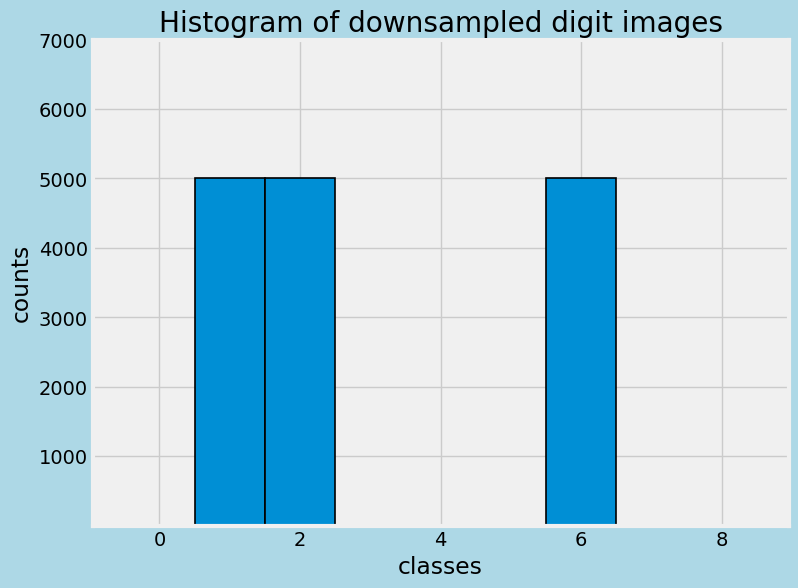

In [100]:
# new histogram
plt.figure(figsize=(8,6), dpi= 100, facecolor='lightblue', edgecolor='k')
plt.hist(y_train, bins=range(10), edgecolor='black', linewidth=1.2, align='left')
plt.xlabel('classes')
plt.ylabel('counts')
plt.title('Histogram of downsampled digit images')
plt.ylim ((1,7000))
plt.show()

New Classes Distribution

In [102]:
def plot_digits(instances, images_per_row=5):
    """
    Plots digits as images.
  
    :param instances: array of digits to be plotted
    :param images_per_row: number of images per row to be plotted
    """
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.figure(figsize=(8,6), dpi= 100, facecolor='lightblue', edgecolor='k')
    plt.imshow(image,  cmap='gist_yarg')
    plt.axis("off")

[ 1792  2252  2383  1873  3372  7155  7093  6244  7858  6909 14730 11056
 11956 11192 13797]


Text(0.5, 1.0, 'Original')

<Figure size 576x576 with 0 Axes>

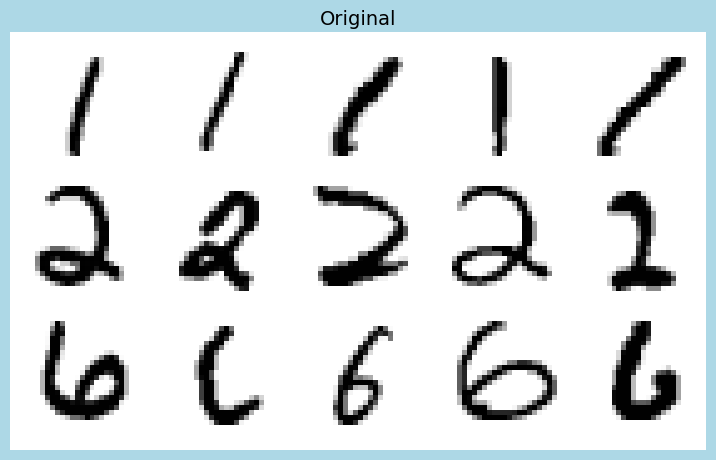

In [103]:
# Show a few instances from each Digit:
plt.figure(figsize=(8,8))

# Selecting a few label indices from each of the 3 classes to show:
label_indices = np.hstack([np.random.choice(np.where(y_train==label)[0], size=5) for label in classes])

print(label_indices)

# Plotting 'original' image
plot_digits(X_train[label_indices,:],images_per_row=5)
plt.title("Original", fontsize=14)

### Commentary:

The plot function outputs a visualisation of 5 digits per class.

###  Splitting the Training data into both Training and Validation Sets:

- Although this is the Training set, we can still set aside some samples (for instance 20%) of the 1,500 instances we have for Model Validation purposes.


- With that Validation Set, we can then select the amount of Uncertainty we are happy with from our Model to use out of sample on other unseen data.


- We can then test out how well our decision performs on the Test Set that we put aside earlier.

In [104]:
### Split tha dataset in training and validation sets
# choose the fraction of your validation data from the training set
w = 0.20
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=w, random_state=0)
 
# Shuffling the training instaces around to randomize the order of inputs to the model:
X_train, y_train = shuffle(X_train, y_train)

In [105]:
# print shape of your validation and training set

print("Validation Shape: ", X_train.shape)
print("Training Shape: ", X_val.shape)

Validation Shape:  (12000, 784)
Training Shape:  (3000, 784)


### Encoding the Class labels for the Probabilistic ML Model:

This is an example:

- **[1,0,0]** for first digit
- **[0,1,0]** for second digit
- **[0,0,1]** for third digit

### General-Recipe ML

In [106]:
# model
model_log = LogisticRegression(random_state=0, max_iter=2000, C=100, solver='lbfgs', multi_class='multinomial')
model_log.fit(X_train, y_train)

# Classification:
y_pred_log = model_log.predict(X_val)
y_pred_logi_prob = model_log.predict_proba(X_val)

# Maybe taking the maximum probability 
# in any of the classes for each observation
prob_classmax = np.max(y_pred_logi_prob,axis=1)

# Computing the Accuracy:
print(f"Accuracy Score: {accuracy_score(y_pred_log, y_val)}")

Accuracy Score: 0.974


## Commentary

For the digit classess 1,2, and 6, we get a score of 0.974 which is an excellent result including hard to detect digits.

In [109]:
np.sort(prob_classmax)

array([0.42794286, 0.51281636, 0.51719572, ..., 1.        , 1.        ,
       1.        ])

In [110]:
# probability of general-recipe logistic regression in wrong instances
prob_classmax[y_pred_log!=y_val]
prob_classmax[y_pred_log!=y_val].shape

(78,)

### Commentary:

78 digits have been misclassified, which is a good performance and ties in with accuracy score as there is 3000 samples in the validation set.

In [112]:
np.array(y_pred_logi_prob)

array([[0.98932606, 0.01067394, 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.00000003, 0.99999997],
       ...,
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.99999994, 0.00000006, 0.        ]])

### Probabilistic Multinomial Logistic Regression:

In [114]:
import sklearn.preprocessing
## We use LabelBinarizer to transfor classes into counts
# neg_label=0, pos_label=1 
y_2_bin = sklearn.preprocessing.LabelBinarizer().fit_transform(y_train.reshape(-1,1))
nf = X_train.shape[1]
# number of classes
nc = len(classes)
# floatX = float32
floatX = tt.config.floatX

init_b = np.random.randn(nf, nc-1).astype(floatX)
init_a = np.random.randn(nc-1).astype(floatX)


with pm.Model() as multi_logistic:
    # Prior
    β = pm.Normal('beta', 0, sigma=100, shape=(nf, nc-1), testval=init_b)
    α = pm.Normal('alpha', 0, sigma=100, shape=(nc-1,), testval=init_a)
    
    # we need to consider nc-1 features because the model is not identifiable
    # the softmax turns a vector into a probability that sums up to one
    # therefore we add zeros to go back to dimension nc
    # so that softmax returns a vector of dimension nc
    β1  = tt.tensor.concatenate([np.zeros((nf,1)),β ],axis=1)
    α1  = tt.tensor.concatenate([[0],α ],)
    
    # Likelihood
    mu = pm.math.matrix_dot(X_train,β1) + α1
    # It doesn't work if the problem is binary
    p = tt.tensor.nnet.nnet.softmax(mu)
    observed = pm.Multinomial('likelihood', p=p, n=1, observed=y_2_bin)

The Multinomial Logistic Regression has some parameters:

- $\alpha$, which is the intercept term:

- $\beta$, which is a vector of coefficients which give a weighting to the importance of each input feature:


In [115]:
y_2_bin

array([[0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [117]:
#https://docs.pymc.io/notebooks/variational_api_quickstart.html

from pymc3.variational.callbacks import CheckParametersConvergence

with multi_logistic:
    mean_field = pm.fit(3000, method="advi", callbacks=[pm.callbacks.CheckParametersConvergence(diff="absolute")]
    )

Finished [100%]: Average Loss = 17,842


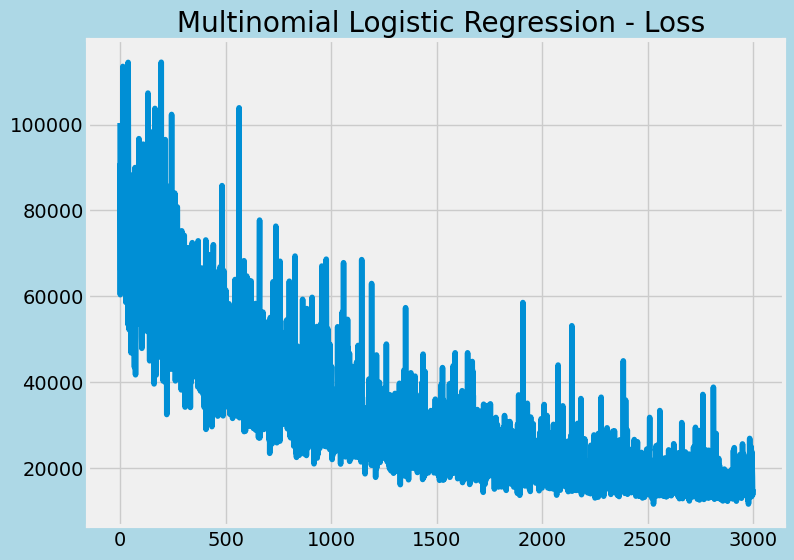

In [118]:
plt.figure(figsize=(8,6), dpi= 100, facecolor='lightblue', edgecolor='k')
plt.title(' Multinomial Logistic Regression - Loss')
plt.plot(mean_field.hist)

### Commentary:

*   We see plotted above the loss per iteration of the Probabilistic Multi Logistic Regression model the PyMC3 automatic differentiation variational inference(ADVI) method.
*   The average loss per iteration is 17,842 at 3000 iteration and we do not get a convergence at any stage.
*   The trend shows a clear decline in loss per iteration.






In [119]:
dd = 300
posterior = approx.sample(draws=dd)

### Commentary:

The posterior is calculated using 300 samples.

test image #10
posterior sample #100
true class= 6.0
classes: [1, 2, 6]
estimated prob= [0.00000001 0.99999359 0.0000064 ]


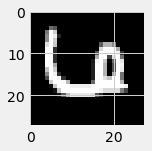

In [120]:
## The softmax function transforms each element of a collection by computing the exponential
#  of each element divided by the sum of the exponentials of all the elements.
from scipy.special import softmax

#select an image in the test set
i = 10 
#i = random.randint(0, dd)

#select a sample in the posterior
s = 100 
#s = random.randint(0, dd)

beta  = np.hstack([np.zeros((nf,1)),  posterior['beta'][s,:] ])
alpha = np.hstack([[0],  posterior['alpha'][s,:] ])
image = X_val[i,:].reshape(28,28)
plt.figure(figsize=(2,2))
plt.imshow(image,cmap="Greys_r")
np.set_printoptions(suppress=True)

print("test image #" + str(i))
print("posterior sample #" + str(s))
print("true class=", y_val[i])
print("classes: " + str(classes))
print("estimated prob=",softmax((np.array([X_val[i,:].dot(beta) + alpha])))[0,:])

### Commentary:

*   We see the probability for this digit 6 been classfied as a 2 as 99%.
*   It is likely that this is due to the image being on its side.

## Bayesian Prediction

In [121]:
# Bayesian prediction
# return the class that has the highest posterior probability
y_pred_Bayesian=[]

for i in range(X_val.shape[0]):
    val=np.zeros((1,len(classes)))
    
    for s in range(posterior['beta'].shape[0]):
        beta = np.hstack([np.zeros((nf,1)),  posterior['beta'][s,:] ])
        alpha = np.hstack([[0],  posterior['alpha'][s,:] ])     
        val = val + softmax((np.array([X_val[i,:].dot(beta) + alpha])))
    
    mean_probability = val/posterior['beta'].shape[0]
    y_pred_Bayesian.append( np.argmax(mean_probability))

In [122]:
print(y_pred_Bayesian)

[0, 2, 1, 0, 1, 0, 2, 2, 1, 0, 1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 0, 0, 0, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 2, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 0, 1, 2, 1, 2, 0, 2, 2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 1, 2, 2, 1, 2, 0, 1, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 2, 2, 1, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 0, 1, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 1, 2, 0, 1, 2, 2, 0, 1, 1, 0, 2, 0, 2, 1, 1, 0, 0, 1, 2, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 2, 1, 0, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 2, 0, 2, 1, 1, 2, 1, 2, 2, 

In [123]:
print(classes)

[1, 2, 6]


In [124]:
# prediction array (using classes)
nn = 10 # just an example
np.array(classes)[y_pred_Bayesian[0:nn]]

array([1, 6, 2, 1, 2, 1, 6, 6, 2, 1])

In [125]:
# using validation: y_val
print("Accuracy=", accuracy_score(np.array(classes)[y_pred_Bayesian], y_val))

Accuracy= 0.93


### Commentary:

We see that we ge a lower score of 93% accuracy in the Bayesian prediction than we do in the General Recipe ML model of 97.4% as the Bayesian algorithm is considering the prior knowledge which includes the misclassified data. As the Bayesian model considers the prior correct classification, we will get a lower score but a more robust answer. If we remove these difficult to identify cases from the training data, we will get a better score.

# Selecting Different Intances

In [126]:
y_predB=[]

for i in range(X_val.shape[0]):
    #print(i)
    val=[]

    for s in range(posterior['beta'].shape[0]):
        beta = np.hstack([np.zeros((nf,1)),  posterior['beta'][s,:] ])
        alpha = np.hstack([[0],  posterior['alpha'][s,:] ])
        val.append(softmax((np.array([X_val[i,:].dot(beta) + alpha])))[0,:])

    #mean probability
    valmean = np.mean(val,axis=0)
    #class with maximum mean probability
    classmax = np.argmax(valmean)
    #ranks
    ranks = np.array(val.copy())
    ranks   = ranks  *0 #init
    colmax = np.argmax(np.array(val),axis=1)
    ranks[np.arange(0,len(colmax)),colmax]=1
     
    y_predB.append( [classmax, valmean[classmax], np.std(ranks,axis=0)[classmax]])

    
y_predB= np.array(y_predB)

In [127]:
# prediction array
mm = 10
y_predB[0:mm,:]

array([[0.        , 0.95406889, 0.19595918],
       [2.        , 0.99168554, 0.05763872],
       [1.        , 0.4848452 , 0.49972215],
       [0.        , 0.99415796, 0.        ],
       [1.        , 0.88554295, 0.30868898],
       [0.        , 0.7028823 , 0.45061686],
       [2.        , 0.99438789, 0.05763872],
       [2.        , 0.86603743, 0.33259919],
       [1.        , 0.76854401, 0.40730824],
       [0.        , 0.95113693, 0.14      ]])

In [128]:
#sorting in descending order
difficult = np.argsort(-y_predB[:,2])
y_predB[difficult[0:mm],:]

array([[1.        , 0.49480976, 0.5       ],
       [0.        , 0.49839978, 0.5       ],
       [1.        , 0.48013423, 0.5       ],
       [2.        , 0.48309342, 0.5       ],
       [1.        , 0.51548267, 0.49998889],
       [0.        , 0.50028033, 0.49998889],
       [1.        , 0.51754405, 0.49998889],
       [2.        , 0.49317873, 0.49998889],
       [1.        , 0.48302633, 0.49995555],
       [0.        , 0.48404489, 0.49995555]])

In [129]:
print(len(difficult))

3000


In [130]:
#probability of general-recipe logistic regression in wrong instances
prob_classmax[y_pred_log != y_val]

array([1.        , 0.9999908 , 0.99995913, 0.99981316, 0.98083271,
       0.93160836, 0.87121878, 0.97077793, 0.99999997, 0.51281636,
       0.92647668, 0.99915538, 0.68446507, 0.99888272, 1.        ,
       0.58892699, 0.93712594, 0.99980657, 0.92448369, 0.86436716,
       0.99999999, 0.74991378, 0.99999971, 0.99946851, 0.9999984 ,
       0.98467027, 0.99772893, 0.99996555, 0.99977217, 0.8898859 ,
       0.85500602, 0.74938554, 0.96669718, 0.97653811, 0.67285204,
       0.6364302 , 0.95327147, 0.96538917, 0.96006529, 1.        ,
       0.99700056, 0.99951839, 0.97160668, 0.63319014, 0.99832596,
       0.98802452, 0.95566242, 0.97789359, 0.68066048, 0.99953724,
       0.93553806, 0.99999203, 0.99911984, 0.52529238, 0.99512415,
       0.99999959, 1.        , 0.9619594 , 0.89507795, 0.8648585 ,
       0.99528907, 0.60178173, 0.67797444, 0.9999999 , 0.98789771,
       1.        , 0.42794286, 0.97469632, 0.99839468, 0.9593731 ,
       0.99944375, 0.99566402, 0.66629481, 0.67123903, 0.97812

In [131]:
y_predB[y_pred_log != y_val,:]

array([[1.        , 0.90204447, 0.29089899],
       [2.        , 0.64306208, 0.47140452],
       [2.        , 0.76069608, 0.42708313],
       [1.        , 0.48013423, 0.5       ],
       [2.        , 0.6097377 , 0.49056657],
       [1.        , 0.63856169, 0.47590849],
       [2.        , 0.7962775 , 0.40247843],
       [0.        , 0.8405265 , 0.35041246],
       [2.        , 0.78508337, 0.40966111],
       [0.        , 0.79159531, 0.38964371],
       [1.        , 0.9999924 , 0.        ],
       [2.        , 0.72651072, 0.44395946],
       [1.        , 0.96107007, 0.17058722],
       [2.        , 0.70331739, 0.45376205],
       [2.        , 0.95943424, 0.18794207],
       [0.        , 0.58189783, 0.48848974],
       [1.        , 0.73254021, 0.43492017],
       [2.        , 0.50866738, 0.49909919],
       [0.        , 0.51870231, 0.49945526],
       [1.        , 0.51789749, 0.49945526],
       [1.        , 0.81369015, 0.38418745],
       [1.        , 0.43934817, 0.49749372],
       [2.

In [132]:
results = []
for i in list(np.arange(100, 3000, 100)):
  model_log = LogisticRegression(random_state=0, max_iter=2000, C=100, solver='lbfgs', multi_class='multinomial').fit(X_train[easy[0:i]], y_train[easy[0:i]])
  y_pred_log = model_log.predict(X_val)
  y_pred_logi_prob = model_log.predict_proba(X_val)
  prob_classmax = np.max(y_pred_logi_prob,axis=1)
  accuracy_score(y_pred_log, y_val)
  results.append (accuracy_score(y_pred_log, y_val))

results.reverse()

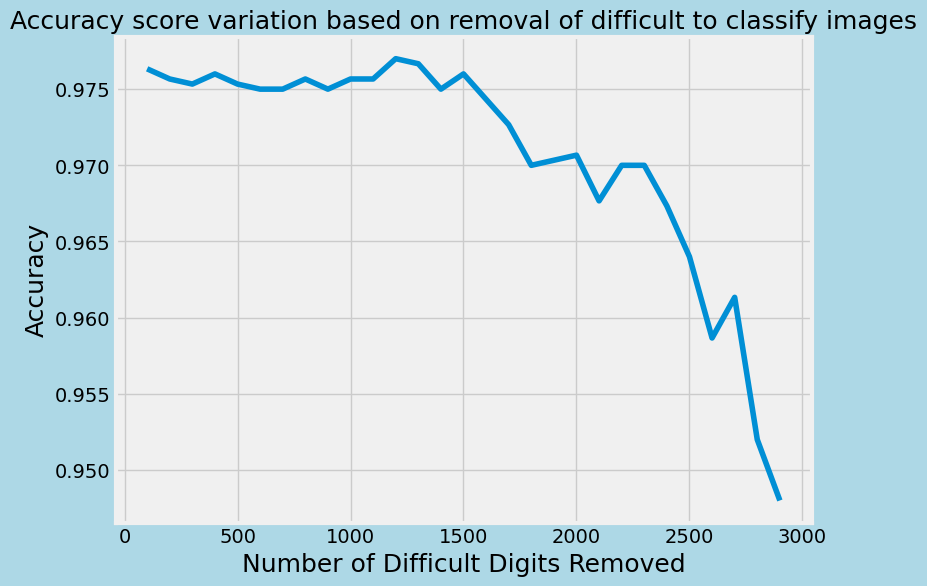

In [133]:
## Graphing the varying effects on accuracy of removing varying amounts of difficult to classify samples (Courtesy of Rob via Nigel's advice)
plt.figure(figsize=(8,6), dpi= 100, facecolor='lightblue', edgecolor='k')
plt.plot((list(np.arange(100, 3000, 100))), results)
plt.title('Accuracy score variation based on removal of difficult to classify images',fontsize=18)
plt.xlabel('Number of Difficult Digits Removed',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.show()

### Commentary:

We see in the graph above, the accuracy of the results as we remove the more difficult to classify data. Let’s we rerun the validation set with the most 100 most easy and difficult classes and see the change in the result.

In [134]:
## Difficult & easy instances

easy = np.argsort(y_predB[:,2])
print("Accuracy in easy instances =", accuracy_score(y_pred_log[easy[0:100]], y_val[easy[0:100]]))

difficult = np.argsort(-y_predB[:,2])
print("Accuracy in difficult instances =", accuracy_score(y_pred_log[difficult[0:100]], y_val[difficult[0:100]]))

Accuracy in easy instances = 1.0
Accuracy in difficult instances = 0.88


### Commentary:

We see the change in the results with 100% accuracy for the 100 easiest to classify digits and 88% accuracy for the 100 most difficult. Let’s test the general recipe ML model again with the 2000 easiest classes and the 1000 most difficult to classify digits. I choose this breakdown as we see the first large drop off in accuracy at 2000 mark in the graph.

In [135]:
## Difficult & easy instances
easy = np.argsort(y_predB[:,2])
print("Accuracy in easy instances =", accuracy_score(y_pred_log[easy[0:2000]], y_val[easy[0:2000]]))

difficult = np.argsort(-y_predB[:,2])
print("Accuracy in difficult instances =", accuracy_score(y_pred_log[difficult[0:1000]], y_val[difficult[0:1000]]))

Accuracy in easy instances = 0.99
Accuracy in difficult instances = 0.949


### Commentary:

Excluding the 1000 most difficult (33% of the validation set), we will get 99% accuracy and 94.9% accuracy for the 1000 most difficult instances. Now that we have tested these scenarios, lets exclude the 1000 most difficult to identify digits from the training data in the general recipe ML model and test the model with the full validation set.

In [136]:
# model
model_log = LogisticRegression(random_state=0, max_iter=2000, C=100, solver='lbfgs', multi_class='multinomial')
model_log.fit(X_train[easy[0:2500]], y_train[easy[0:2500]])

# Classification:
y_pred_log = model_log.predict(X_val)
y_pred_logi_prob = model_log.predict_proba(X_val)

# Maybe taking the maximum probability 
# in any of the classes for each observation
prob_classmax = np.max(y_pred_logi_prob,axis=1)

# Computing the Accuracy:
print(f"Accuracy Score: {accuracy_score(y_pred_log, y_val)}")

Accuracy Score: 0.9756666666666667


### Commentary:

A slightly improved score of 97.5% is got when we rerun the general recipe ML with the 1000 most difficult instances removed from training set.

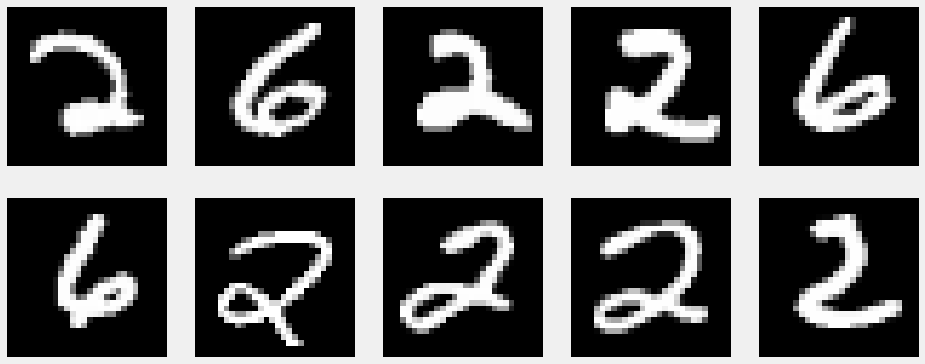

In [137]:
# show 10 random 'easy' images
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

for i in range(10):
    index = easy[i]
    image = X_val[index,:].reshape(28,28)
    axs[i].axis('off')
    axs[i].imshow(image,cmap="Greys_r")
    

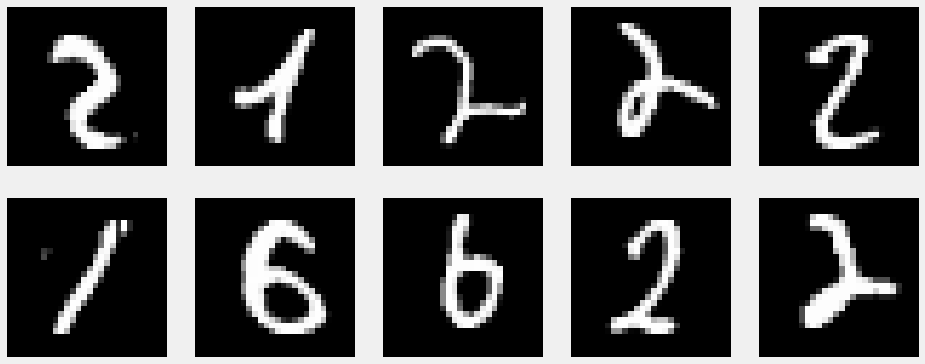

In [138]:
# show 10 random 'difficult' images
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    index = difficult[i]
    image = X_val[index,:].reshape(28,28)
    axs[i].axis('off')
    axs[i].imshow(image,cmap="Greys_r")
    

## Commentary

We can visually see the hard to identify digits here. I would guess that the first digit on the top left and the digit on the bottom right are both two's but this may not be clear to the ML model. We still see an accuracy score of ~97.4% but for this exercise we want to achieve 100% accuracy on the digits that we are willing to classify due to their high probablity of being correct. For intances that have a low probability of correct classification, we want to produce a non conclusive result.

## Summary

Populate this section with all of your findings and comments fron the discussion with your peers.

#### Data:

The MNIST dataset (Redmon, 2018) is an easy to use dataset of images ranging from 1 to 9 that can be used for Machine Learning Algorithms for beginners. The dataset consists of two files: mnist_train.csv and mnist_test.csv. The test set contains 60,000 training examples and labels while the mnist_test.csv contains 10,000 test examples of the same. Each row consists of 785 values: the first value is the label (a number from 0 to 9) and the remaining 784 values are the pixel values (a number from 0 to 255). As seen from the graphs, there is an relatively even distribution of the different digits (1-9) with 1 been the highest represented number. 

#### Environment:

Google Colab was used recommended in the instructions and I found the implementation seamless using this environment. I had previously Google Colab during prior assignments as part of the MSc In Artificial Intelligence, so I was comfortable using it. Google Colab integrated with easily with Github which was the repository of choice for our team (Group 1). The only problem, I found was the slowness of the execution of the algorithm although this maybe more to do with the code rather than the environment itself. I did not run this locally so I cannot verify this but I have seen comments stating that the execution was “slow” when run locally.

#### Task:

There were five main tasks to be completed which I will not repeat as this not necessary. I used the traffic sign example as the main template for executing this task which was very helpful. The big challenge was to understand the code and then modify it to fit the MNIST data. The next big challenge was to correctly interrupt the results and correctly assess the execution of a Multinomial General Machine Learning (ML) model and a Bayesian Model on the MNIST data.

Once the MNIST data was loaded from the colab repository in my google drive, the data was downsized to three digits with 5000 of each digit. The three digits to selected were randomly picked using a function. The dataset was split 80:20 of training and validation and I did not feel the need to change it to 40:60 as outlined as an option in the instructions. The randomly selected digits that were picked in the final run were 1,2, and 6.

#### Multinomial General Machine Learning (ML):

The dataset was then processed through the multinomial logistic regression algorithm where an accuracy an accuracy score of 97.4% was achieved with 78 misclassifications were found in the validation set of 3’000. The results from Probabilistic Multinomial Logistic Regression were then plotted showing a decline per iteration with an average of 17,842 over 3000 iterations. The model did not converge at any point. The loss was calculated using Theano’s pm.model() with $\alpha$ and $\beta$ given a normal distribution from 0 to 1 with sigma = 100 with the SoftMax function given the probabilities of the random classes selected, in this case 1,2, and 6.
The scipy.special SoftMax function provides an example of a 6 which is rotated on its side having a probability of being classified as a 6 at virtually 0% while the probability of it been classified as 2 been 99%. This shows us the model will need further improvements in order be able to handle these instances or else be given an inconclusive result of the probability the classification been correct is not high. As stated by Murphy, (1990) “Many generic classification methods ignore any structure in the input features, such as spatial layout”.

#### Bayesian Prediction:

We see that we get a lower score of 93% accuracy in the Bayesian prediction than we do in the General Recipe ML model of 97.4% as the Bayesian algorithm is considering the prior knowledge which includes the misclassified data. As the Bayesian model considers the prior correct classification, we will get a lower score but a more robust answer. If we remove these difficult to identify cases from the training data, we will get a better score. An advantage of the Bayesian approach is that it allows the use of prior knowledge which is an interesting feature in predictive validity studies (Tendeiro et al., 2014)

#### Updated General Recipe Model:

Finally, we investigate the difficult to classify digits and using a plot courtesy of Rob Barrett via a recommendation from Nigel Portley, there is step drop off in accuracy after the 2000 easiest to classify digits. We see the change in the results with 100% accuracy for the 100 easiest to classify digits and 88% accuracy for the 100 most difficult. Excluding the 1000 most difficult (33% of the validation set), we will get 99% accuracy and 94.9% accuracy for the 1000 most difficult instances. 
When we remove the 1’000 most difficult digits from the training set, and run the full validation, we get a slightly improved result of 97.5%. There was much debate on the forum as to what the right approach was as some thought we just needed to alter the validation data to remove the difficult digits while others thought we needed to re-train the general recipe ML with the difficult instances removed from the training data. Either way I did both to cover all the basis.

#### Bayesian Vs General Recipe Multinomial Logistic Regression ML

My overall summary is that the best model is the Bayesian model as it is more robust as it considers the prior knowledge while the Multinomial Logistic Regression is still a useful model.
I looked deepest into knowledge of my group for this exercise and found their opinions useful. This was a challenging assignment, but I really enjoyed it.

#### References:

Murphy, K. P. (1990) ‘Machine Learning - A Probabilistic Perspective’, Machine Learning, pp. 555–610. doi: 10.1016/b978-0-08-051055-2.50029-8.

Redmon, J. (2018) MNIST in CSV. Available at: https://pjreddie.com/projects/mnist-in-csv/ (Accessed: 19 September 2021).

Tendeiro, J. N. et al. (2014) ‘Predicting Future Study Success: How A Bayesian Approach can be of Help to Analyze and Interpret Admission Test Scores’, Paper Knowledge . Toward a Media History of Documents, pp. 1–41.





In [142]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Etivity_1_Stephen_Quirke_20172257.ipynb')